# 1. Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

### For saving the model

In [18]:
import joblib  

# 2. Load Dataset

In [19]:
# Try one of these encodings — start with 'latin1'
df = pd.read_csv('Movies_India.csv', encoding='latin1')

#Some files from non-English regions or older systems use a different text encoding. 
#Your file probably contains special characters (like é, ñ, etc.) that utf-8 can't understand.
#Changing the encoding= argument tells Python how to read those characters correctly.

print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

# 3. Keep important columns

In [20]:
# Combine actor columns into a single string
df['Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].astype(str).agg(' '.join, axis=1)

# Example result:
# "Shah Rukh Deepika Boman"
# "Aamir Kareena R. Madhavan"

In [21]:
actors_encoder = LabelEncoder()
df['Actors'] = actors_encoder.fit_transform(df['Actors'])

In [22]:
df = df[['Genre', 'Director', 'Actors','Rating']]
df = df.dropna(subset=['Rating'])

# 4. Fill missing values

In [23]:
df.fillna('Unknown', inplace=True)

# 5. Encode text into numbers

In [24]:
le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actors = LabelEncoder()

df['Genre'] = le_genre.fit_transform(df['Genre'])
df['Director'] = le_director.fit_transform(df['Director'])
df['Actors'] = le_actors.fit_transform(df['Actors'])

# 6. Features & Target

In [25]:
X = df[['Genre', 'Director', 'Actors']]
y = df['Rating']

# 7. Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Use Random Forest Model

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 9. Prediction and Evaluation

In [28]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Predictions (first 5):", predictions[:5])
print("Actual Ratings (first 5):", y_test.values[:5])
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Predictions (first 5): [4.688 6.109 5.557 6.813 4.687]
Actual Ratings (first 5): [3.3 5.3 5.7 7.2 3.5]
Mean Squared Error: 1.6770751908335089
R2 Score: 0.097932079550337


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


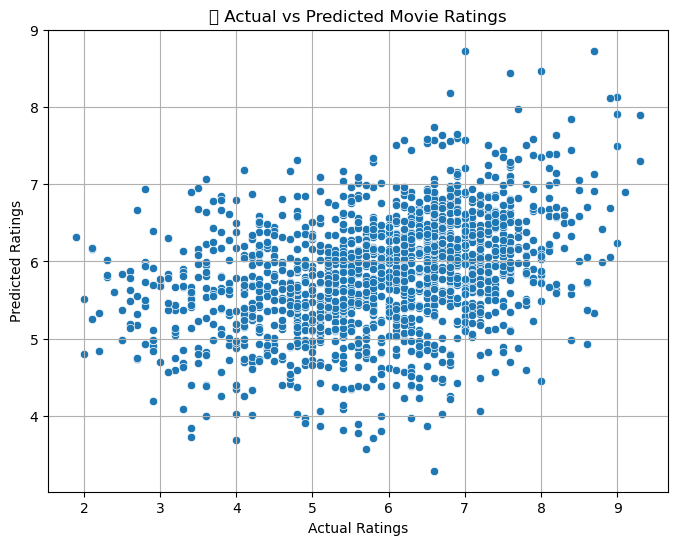

In [29]:
# 10. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("🎬 Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()

# 11. Save the Model

In [30]:
joblib.dump(model, 'movie_rating_model.pkl')
print("✅ Model saved as 'movie_rating_model.pkl'")

✅ Model saved as 'movie_rating_model.pkl'


In [16]:
# Save the label encoders
joblib.dump(le_genre, 'genre_encoder.pkl')
joblib.dump(le_director, 'director_encoder.pkl')
joblib.dump(le_actors, 'actors_encoder.pkl')
print("✅ Encoders saved successfully.")

✅ Encoders saved successfully.
